importing Jupyter notebook from GettingData.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


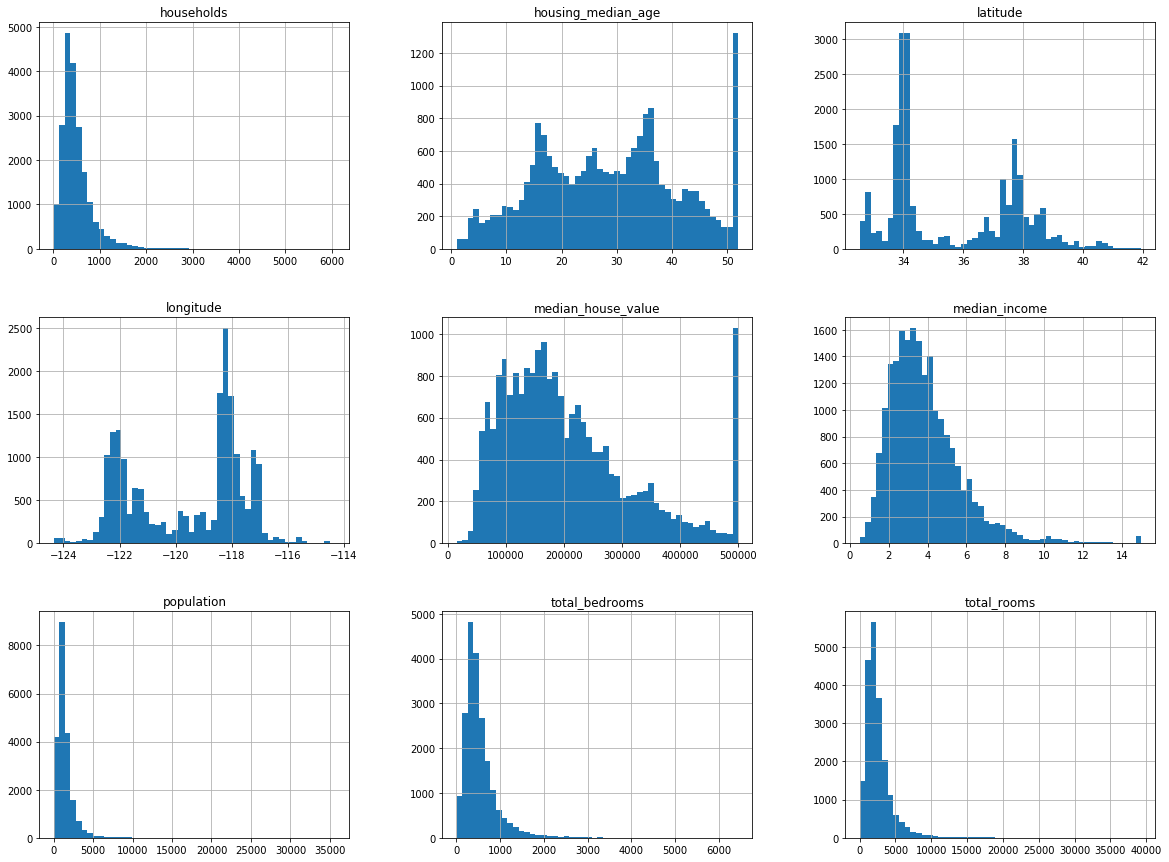

In [3]:
import import_ipynb
from GettingData import load_housing_data, stratified_split_train_test

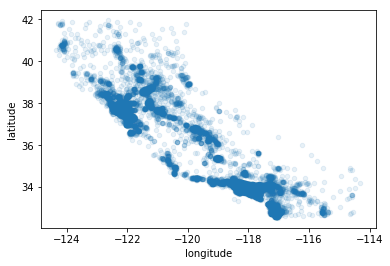

In [5]:
housing = load_housing_data()
train, _ = stratified_split_train_test(housing)
train.drop(train['income_cat'])
train_copy = train.copy()
train_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)

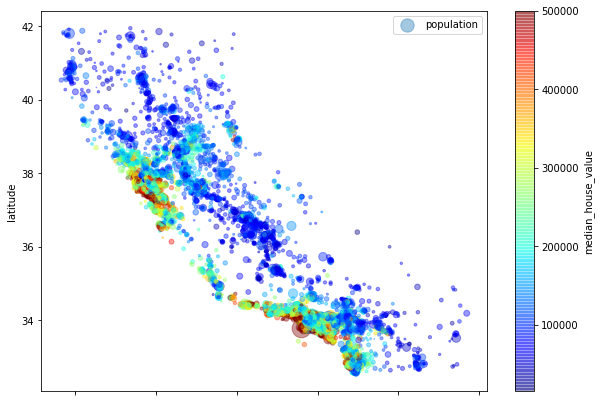

In [7]:
# More in-detail graph
import matplotlib.pyplot as plt

train_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=.4,
               s=housing['population']/100, label='population', figsize=(10,7),
               c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [8]:
corr_matrix = train_copy.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000130757E0748>,
      dtype=object)

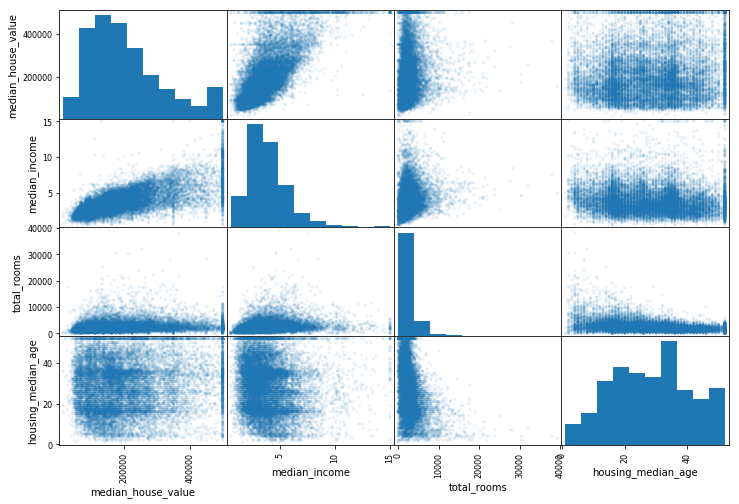

In [9]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(train_copy[attributes], figsize=(12,8), alpha=.1)


In [10]:
# Let's add some attributes
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [12]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64